In [17]:
from torch import nn, optim
import numpy as np
import pickle as p
import torch
from tqdm.notebook import trange
from tqdm import tqdm
import matplotlib.pyplot as plt

from network import ConvNet
from sklearn.metrics import f1_score
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from dataset import CogDataset

In [15]:
# function for training and evaluation
def test(model, test_dataloader):
    accuracies = []
    f1_scores = []

    with torch.no_grad():

        model.eval()

        running_accuracy = 0.0
        running_f1 = 0.0

        for input, target in test_dataloader:

            output = model(input)

            prediction = torch.argmax(output, dim=1).float()   

            for o, t in zip(prediction, target):
                if o == t:
                    running_accuracy+=1 
            #running_f1 += f1_score(target, prediction)

            running_accuracy /= (len(test_dataloader)*batch_size)
            #running_f1 /= len(val_dataloader)

            accuracies.append(running_accuracy)
            #f1_val.append(running_f1)

            # output
            if len(accuracies) % 20 == 0:
                tqdm.write('No. {} (test) -- acc: {:.4f}'.format(len(accuracies), running_accuracy))

    # make metrics callable outside this function
    test.accuracy = accuracies
    # test.f1_score = f1_scores

In [4]:
# load data and label files
# shape = [2284, 200, 3, 9] --> [datasets, time series, channels, devices]
data = p.load(open(r"data/test.pkl", "rb"))
labels = p.load(open(r"data/labels_test.pkl", "rb"))
print(data.shape)

batch_size = 1

# create datasets
test_dataset = CogDataset(data, labels, train=False)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

(2288, 8, 200, 3)


In [10]:
# load model for testing
net_num = 0
model = ConvNet()
model.load_state_dict(torch.load("trained_models/net_" + str(net_num) + ".pt"))

<All keys matched successfully>

In [16]:
# test model
test(model.double(), test_dataloader)

0.0
0.0
0.0
0.0
0.0
0.0
0.002183406113537118
4.767262256631262e-06
1.0408869555963454e-08
0.0021834061362639074
4.767262306253073e-06
1.0408869664308019e-08
2.2726789660061177e-11
4.962181148484973e-14
1.0834456656080727e-16
2.365601889973958e-19
5.1650696287641e-22
1.1277444604288428e-24
2.4623241494079537e-27
5.37625360132741e-30
No. 20 (test) -- acc: 0.0000
1.1738544981064213e-32
2.5630010875686053e-35
5.596072243599575e-38
1.2218498348470688e-40
2.6677943992294077e-43
5.824878600937572e-46
1.2718075547898628e-48
2.77687239037088e-51
6.063040153648209e-54
1.3238078938096525e-56
2.890410248492691e-59
0.002183406113537118
4.767262256631262e-06
0.002183416522406674
4.767284983420685e-06
1.0408919177774421e-08
2.2726897768066422e-11
0.00218340611358674
4.767262256739607e-06
1.0408869556200015e-08
No. 40 (test) -- acc: 0.0000
2.27267894240175e-11
4.9621810969470524e-14
1.0834456543552517e-16
2.3656018654044796e-19
5.165069575118951e-22
1.1277444487159282e-24
2.4623241238339043e-27
5.3762

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


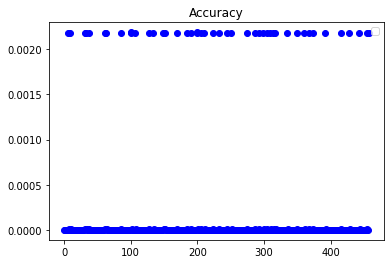

In [20]:
# plot metrics

# accuracy
plt.scatter(np.arange(len(test.accuracy)), test.accuracy, color="b")
plt.title("Accuracy")
plt.legend()
plt.show()